In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
import os
import shutil
import time

# Plot Space average of u(t)

In [21]:
dt = 0.01
tspan = 1000
tspan/dt

100000.0

In [22]:
dx = 1
L = 100

Text(0.5, 1.0, '2D\nC = 0.1*sin(2*pi*t/10)')

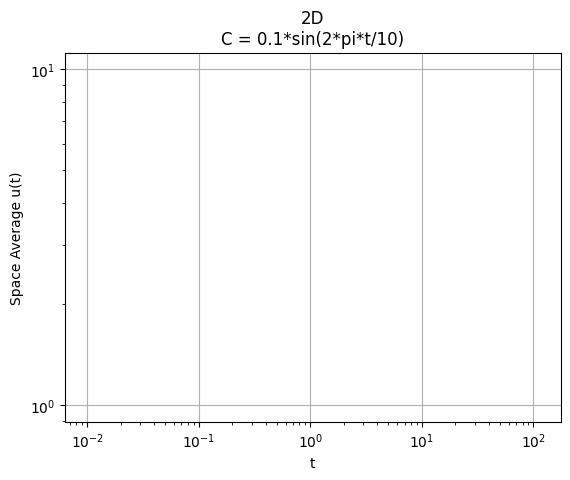

In [23]:
f = open("../fileAveout.dat", "r")
N = int(round(tspan/dt))
tt = np.zeros(N)
ave = np.zeros(N)

i = 0
for row in f:
    a, b = row.split(" ")
    tt[i] = float(a)
    ave[i] = float(b)
    i = i + 1

ns = np.arange(0,i)
T = 10
#ns = np.arange(0, i, int(T/dt))

# Motion by curvature
fig, ax = plt.subplots()
ax.loglog(tt[ns], ave[ns],'.')
#plt.ylim(0)

ax.set_xlabel("t")
ax.set_ylabel("Space Average u(t)")
#plt.yscale("linear")
ax.grid()
ax.set_title("2D\nC = 0.1*sin(2*pi*t/10)")



# Plot final state u(x, tmax)

/tmp/ipykernel_12835/928964425.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)


Text(0.5, 1.0, 't = 110.000000')

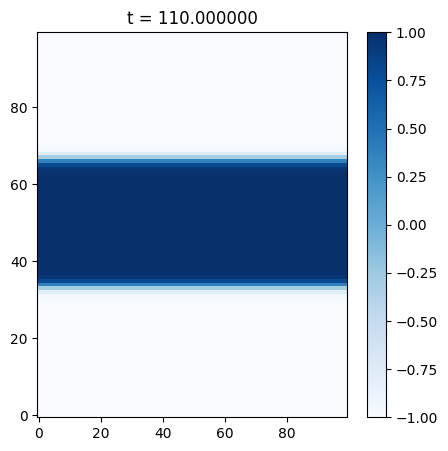

In [24]:
f = open("../state.dat", "r")
N = int(L/dx)
x = np.zeros(N)
y = np.zeros(N)
Z = np.zeros((N,N))
i = 0
for row in f:
    if i != 0:
        a, b, c = row.split(" ")
        #a, b = row.split("	")
        J = np.mod(i-1,N)
        I = int((i-1)/N)
        x[I] = float(a)
        y[J] = float(b)
        Z[I][J] = float(c)
    else:
        N, tmax, dx = row.split(" ")
        dx = float(dx)
        N = int(N)

    i = i + 1

#x = x[0:i-1]
#y = y[0:i-1]

# Make up some fake data
X,Y = np.meshgrid(x,y)

fig = plt.figure(figsize = (5,5))
fig.subplots_adjust(wspace=0.3)

# Blues
#plt.figure(figsize=(10,10))
plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('Blues'), vmin=-1, vmax=1)
plt.colorbar()
#plt.axis([-3, 3, -3, 3])
plt.title('t = ' + str(tmax))